In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
START_DATE = '2024-01-01'
END_DATE = '2024-01-02'

dates = pd.date_range(
    start=START_DATE,
    end=END_DATE, 
    freq='min',
)

In [56]:
def get_random_values(dates):
    return np.random.randint(low=0, high=100, size=len(dates))

def get_linear_values(dates):
    x = np.arange(len(dates))
    return 2 * x + 10

def get_trend_values(dates):
    trend = np.arange(len(dates))
    hourly_component = np.sin(2 * np.pi * dates.hour / 24)
    noise = np.random.normal(0, 1, len(dates))   
    return 10 + 0.5 * trend + 1000 * hourly_component + 3 * noise 

def plot_values(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df['value'], marker='o')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

def get_duration(df):
     return (df['date'] - pd.to_datetime('2024-01-01')).dt.total_seconds()   
    
def linear_model(df):
    df['duration'] = get_duration(df)
    X = df['duration'].values.reshape(-1, 1)
    y = df['value']
    
    model = LinearRegression()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    var = df['value'].var()
    
    print(f'MSE: {mse} vs Var: {var}')

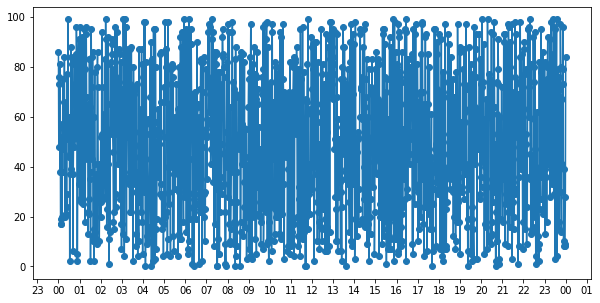

In [57]:
random_df = pd.DataFrame({
    'date': dates, 
    'value': get_random_values(dates),
})
plot_values(random_df)

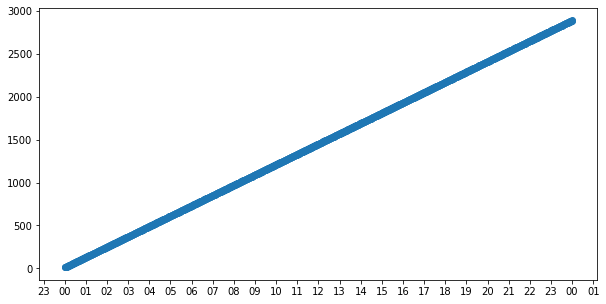

In [58]:
linear_df = pd.DataFrame({
    'date': dates, 
    'value': get_linear_values(dates),
})
plot_values(linear_df)

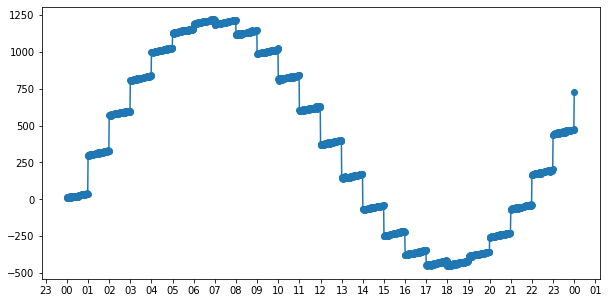

In [59]:
trend_df = pd.DataFrame({
    'date': dates, 
    'value': get_trend_values(dates),
})
plot_values(trend_df)

In [61]:
linear_model(random_df)

MSE: 885.4297452389977 vs Var: 835.8052105019661


In [62]:
linear_model(linear_df)

MSE: 1.5075587199808106e-24 vs Var: 692640.6666666666


In [63]:
linear_model(trend_df)

MSE: 206990.15542541636 vs Var: 315441.01540299656
